In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import mode

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv


# * **EDA (KEŞİFÇİ VERİ ANALİZİ)**

In [2]:
# CSV dosyasını oku ve ilk 5 elemanı göster.
df = pd.read_csv("/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv")
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# Verilerin boyutunu kontrol et
df.shape

(6362620, 11)

Veri setimiz 6362620 gözlemden ve 11 kategoriden oluşmaktadır.

In [4]:
# Veriler hakkında bilgi al
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# Verilerin tanımlayıcı istatistiklerini al
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


# * **Veri Ön İşleme**

*Eksik değer kontrolü*

In [6]:
if df.isnull().values.any():
    print('There are some missing values in this dataset\n')
    df.dropna(inplace=True)
    print('Shape : ', data.shape) 
else:
    print('GREAT, There is no missing values in this dataset')

GREAT, There is no missing values in this dataset


*Aykırı değerleri incelemek ve görmek için tablo çizimi*

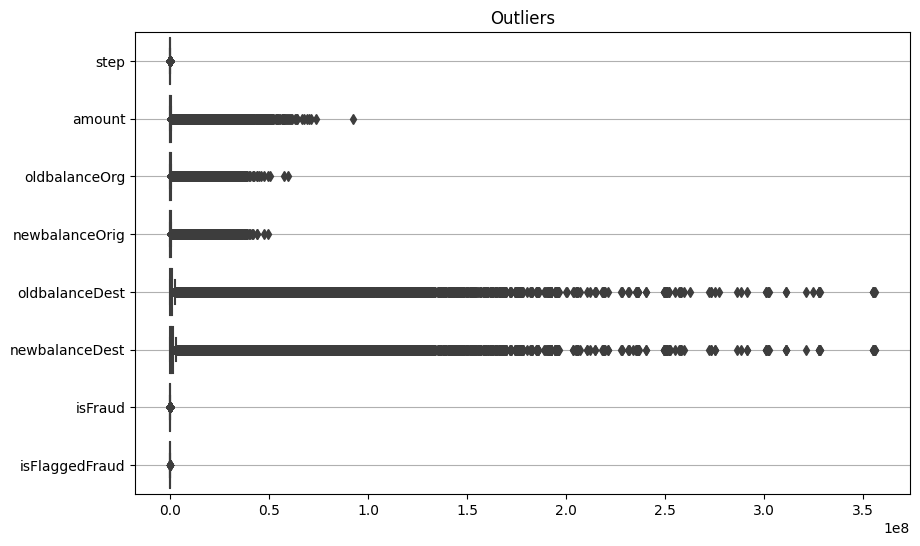

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='h') # horizontal
plt.title('Outliers')
plt.grid(axis='y')
plt.show()

# * **"type" Özelliğinin Kategorilerinin EDA Çalışması**

In [8]:
# Type değişkenindeki benzersiz değerler (kategori adları)
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
# Type değişkeni içindeki kategorilere göre saklanan veri sayısı
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

*Yukardaki çalışmanın görselleştirilmiş hali*

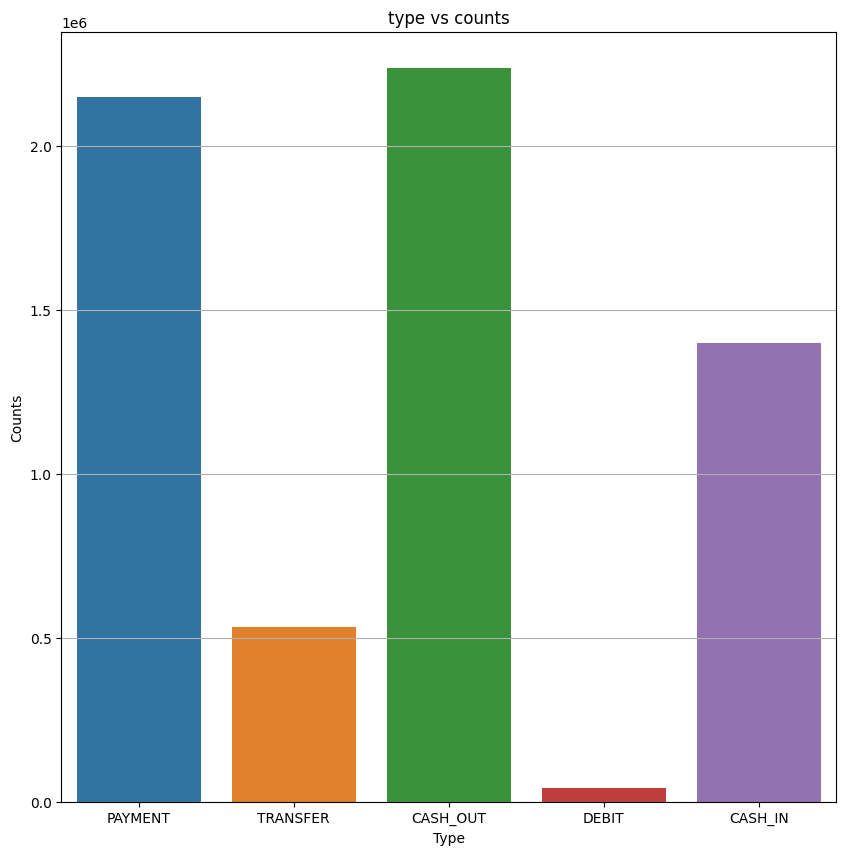

In [10]:
plt.figure(figsize=(10,10))
plt.title('type vs counts')
sns.countplot(data=df,x='type')
plt.xlabel('Type')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=1)
plt.show()

# * ***Label Encoding***

Kategorik değerleri sayısal değerlere dönüştürme

In [11]:
df['type'].replace({'CASH_OUT':0, 'PAYMENT':1, 'CASH_IN':2, 'TRANSFER':3, 'DEBIT':4}, inplace=True)

/tmp/ipykernel_17/1690466510.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['type'].replace({'CASH_OUT':0, 'PAYMENT':1, 'CASH_IN':2, 'TRANSFER':3, 'DEBIT':4}, inplace=True)
/tmp/ipykernel_17/1690466510.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['type'].replace({'CASH_OUT':0, 'PAY

In [12]:
df['type'].value_counts()

type
0    2237500
1    2151495
2    1399284
3     532909
4      41432
Name: count, dtype: int64

In [13]:
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,3,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,0,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,1,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,1,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,1,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,1,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,4,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


# * **"isFraud" Özelliğinin Kategorilerinin EDA Çalışması**

In [14]:
# "isFraud" benzersiz değerleri
df['isFraud'].unique()


array([0, 1])

In [15]:
# isFraud değişkeni içindeki kategorilere göre saklanan veri sayısı
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

*Yukardaki çalışmanın görselleştirilmiş hali*

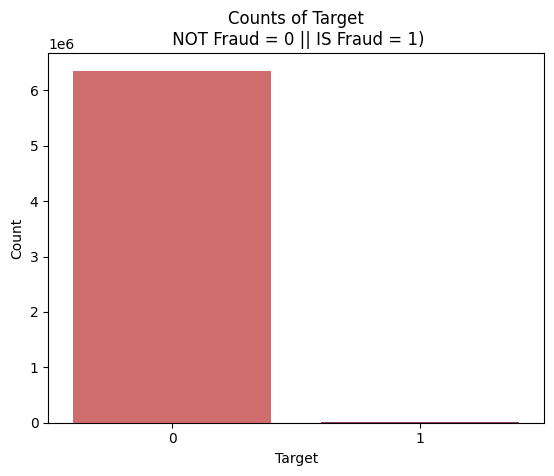

In [16]:
Target_counts = df['isFraud'].value_counts()

# Plot

sns.barplot(x=Target_counts.index, y=Target_counts.values, palette='flare')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Counts of Target\n NOT Fraud = 0 || IS Fraud = 1)')
plt.xticks()
plt.show()

# * **Gereksiz Olan Sütunları Droplama**

In [17]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [18]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

# * **Öznitelik Çıkarımı**

In [19]:
# Sayısal sütunlar arasındaki korelasyonu hesaplayalım. Korelasyon katsayısı 1'e yaklaştıkça değişkenlerin arasındaki ilişkinin gücü artar.
df.corr(numeric_only=True)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.012627,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
type,0.012627,1.000000,0.198987,0.260418,0.270669,0.066255,0.079111,0.016171,0.003144
amount,0.022373,0.198987,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,0.260418,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,0.270669,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.066255,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.079111,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.016171,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.003144,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


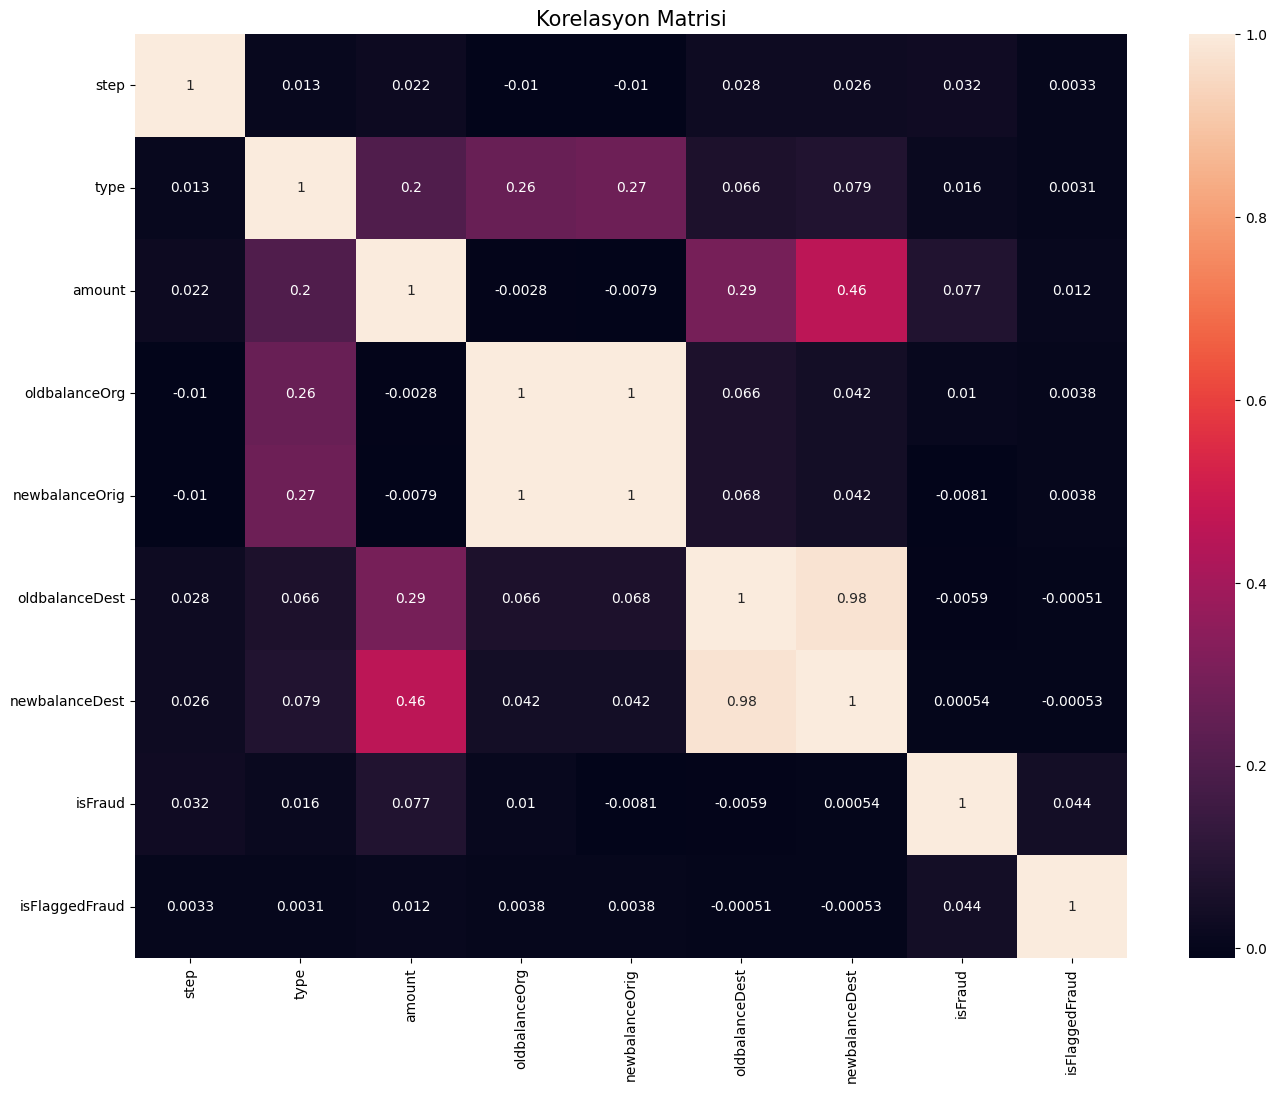

In [20]:
# Korelasyon matrisini görselleştir
plt.figure(figsize=(16, 12))
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)
plt.title('Korelasyon Matrisi', fontsize=15)
plt.show()

# * **Korelasyona Göre Gereksiz Sütunları Droplama**

In [21]:
df.drop(['newbalanceOrig', 'oldbalanceDest'], axis=1, inplace=True)

In [22]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceDest  float64
 5   isFraud         int64  
 6   isFlaggedFraud  int64  
dtypes: float64(3), int64(4)
memory usage: 339.8 MB


# * **Verileri Test ve Eğitim Kümelerine Bölmek**

In [24]:
# X Data
x = df.drop(['isFraud'], axis=1)
print('X shape is : ' , x.shape)
print()

# y Data
y = df['isFraud']
print('Y shape is : ' , y.shape)

X shape is :  (6362620, 6)

Y shape is :  (6362620,)


In [25]:
x

,step,type,amount,oldbalanceOrg,newbalanceDest,isFlaggedFraud
0,1,1,9839.64,170136.00,0.00,0
1,1,1,1864.28,21249.00,0.00,0
2,1,3,181.00,181.00,0.00,0
3,1,0,181.00,181.00,0.00,0
4,1,1,11668.14,41554.00,0.00,0
...,...,...,...,...,...,...
6362615,743,0,339682.13,339682.13,339682.13,0
6362616,743,3,6311409.28,6311409.28,0.00,0
6362617,743,0,6311409.28,6311409.28,6379898.11,0
6362618,743,3,850002.52,850002.52,0.00,0


In [26]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

X ve y değişkenlerimizi görüntülüyoruz.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)

# Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (4453834, 6)
X_test shape is  (1908786, 6)
y_train shape is  (4453834,)
y_test shape is  (1908786,)


Verimizi %70 eğitim, %30 test olacak şekilde setlere böldük.

*ML kısmı için verileri daha uygun hale getirme işlemi*

In [28]:
# Standartizasyon (Z-Puanına Göre Normalizasyon) 
# Veri İçin StandardScaler

scaler = StandardScaler()

# Eğitim verisinin standartizasyonunu hesapla
scaler.fit(X_train)

# Standartize edilmiş eğitim ve test verilerini sakla
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. GaussianNB Modeli

In [29]:
# GaussianNB Modeli
gnb = GaussianNB()
gnb_tuned = gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb_tuned.predict(X_test_scaled)

Gaussian Naive Bayes modelimizi kurup, eğitim verilerimizle modelimizi eğitiyoruz. Eğitilmiş modelle test verisi üzerinde tahminler yaptırıyoruz. Bu işlemler sonucunda, test verisi için modelin tahmin ettiği sınıflar y_pred_gnb değişkeninde saklanır. Gaussian Naive Bayes modelinin temel avantajı, hızlı ve basit bir şekilde uygulanabilmesi ve küçük veri kümelerinde veya yüksek boyutlu veri kümelerinde genellikle iyi performans göstermesidir.

# 2. DecisionTree Modeli (criterion='gini')

In [30]:
# DecisionTree Modeli (criterion='gini')
dt_gini = DecisionTreeClassifier(criterion='gini')
dt_gini_tuned = dt_gini.fit(X_train_scaled, y_train)
y_pred_dt_gini = dt_gini_tuned.predict(X_test_scaled)

Karar ağacı modelimizi kurup, eğitim verilerimizle gini kriterine bağlı modelimizi eğitiyoruz. Eğitilmiş modelimizle test verileri üzerinde tahminler yaptırıyoruz.

Bu işlemler sonucunda, test verisi için modelin tahmin ettiği sınıflar y_pred_dt_gini değişkeninde saklanır. Karar ağaçları, veri setindeki örüntüleri öğrenmek için dallanmalar ve yapraklar kullanarak çalışan esnek ve sezgisel modellerdir. Gini impurity ve bilgi kazancı (entropy) gibi kriterler kullanılarak, veriyi en iyi şekilde ayıran noktalar bulunur. Karar ağaçlarının temel avantajı, veri üzerinde görsel olarak anlaşılabilir modeller oluşturmaları ve farklı türdeki verilerle kolayca çalışabilmeleridir

# 3. DecisionTree Modeli (criterion='entropy')

In [31]:
# DecisionTree Modeli (criterion='entropy')
dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_entropy_tuned = dt_entropy.fit(X_train_scaled, y_train)
y_pred_dt_entropy = dt_entropy_tuned.predict(X_test_scaled)

Karar ağacı modelimizi kurup, eğitim verilerimizle entropy kriterine bağlı modelimizi eğitiyoruz. Eğitilmiş modelimizle test verileri üzerinde tahminler yaptırıyoruz.

Bu işlemler sonucunda, test verisi için modelin tahmin ettiği sınıflar y_pred_dt_entropy değişkeninde saklanır. Entropy kriteri, bilgi teorisine dayanır ve veri setindeki belirsizliği ölçer. Entropy, bir düğümdeki bilgi miktarını ölçer ve düğümdeki örneklerin saflığını artırmak için çalışır. Entropy değeri ne kadar düşükse, düğümdeki belirsizlik o kadar azdır. Karar ağacı, veri setini bölmek için bilgi kazancını maksimum yapacak şekilde dallanmalar oluşturur.

# 4. K-Means Modeli

In [32]:
# K-Means modelini oluştur ve eğit (n_clusters: sınıf sayısına eşit olacak şekilde belirlenir)
kmeans = KMeans(n_clusters=len(np.unique(y_train)), random_state=42, n_init=10)
kmeans.fit(X_train_scaled)
y_pred_k = kmeans.predict(X_test_scaled)

K-Means, veriyi kümelere ayırmak için iteratif bir süreç kullanır. Rastgele merkezlerle başlar, veri noktalarını bu merkezlere atar ve ardından her kümenin merkezini günceller. Bu adımlar, kümeler istikrar kazanana kadar tekrar eder. Bu şekilde K-Means, verileri anlamlı gruplara ayırarak, benzerliklere dayalı analizlerin yapılmasını sağlar.

In [33]:
# Tahmin edilen kümeler ile gerçek etiketleri kıyasla
# Tahmin edilen kümeler ile gerçek sınıflar doğrudan karşılaştırılamayacağı için, kümeleri gerçek etiketlerle uyumlu hale getirebiliriz.
# Bunun için en uygun eşleşmeleri bulmak için bir yöntem kullanacağız.
# Kümeleri sınıf etiketlerine eşle
y_pred_kmean = np.zeros_like(y_pred_k)
for i in range(len(np.unique(kmeans.labels_))):
    mask = (y_pred_k == i)
    y_pred_kmean[mask] = mode(y_test[mask])[0]

# Eğitilmiş Modellerin Tahminlerinin Test Verilerine Göre Karşılaştırılması-Sonuçları

In [34]:
models = {
    'DecisionTree (Gini)': y_pred_dt_gini,
    'DecisionTree (Entropy)': y_pred_dt_entropy,
    'GaussianNB': y_pred_gnb,
    'K-Means': y_pred_kmean
}

In [35]:
for name, y_pred in models.items():
    print(f"Model: {name}")
    print("Doğruluk Skoru:", accuracy_score(y_test, y_pred))
    print("Karmaşıklık Matrisi:\n", confusion_matrix(y_test, y_pred))
    print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))
    print("Precision Score:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall Score:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("\n")

Model: DecisionTree (Gini)
Doğruluk Skoru: 0.9994865846669034
Karmaşıklık Matrisi:
 [[1905858     493]
 [    487    1948]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.80      0.80      0.80      2435

    accuracy                           1.00   1908786
   macro avg       0.90      0.90      0.90   1908786
weighted avg       1.00      1.00      1.00   1908786

Precision Score: 0.9994872187168531
Recall Score: 0.9994865846669034
F1 Score: 0.999486900146026


Model: DecisionTree (Entropy)
Doğruluk Skoru: 0.9995101598607702
Karmaşıklık Matrisi:
 [[1905887     464]
 [    471    1964]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.81      0.81      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.90      0.90      0.90   1908786
weighte

Farklı makine öğrenimi modellerinin performanslarını değerlendirmek ve karşılaştırmak için çeşitli metrikler kullandık. Bu metrikler arasında doğruluk skoru, karmaşıklık matrisi, sınıflandırma raporu, precision, recall ve F1 skoru bulunur. Kod, her modelin test verisi üzerindeki tahminlerini değerlendirir ve sonuçları ekrana yazdırır. Bu sayede hangi modelin daha iyi performans verdiğini kolayca görebiliriz.